<p>
<b>Data de entraga:</b> 29/10. 
<p>
<b>Forma de entrega:</b> envie para levilelis@gmail.com o arquivo do seu notebook com a resposta teórica, a sua implementação, e o seu gráfico mostrando as frações das estratégias 49, 50 e 51 ao longo do tempo. 

<h3>Formulação do Problema</h3>

Em um problema visto em sala de aula, a mãe oferece a irmãs gêmeas o seguinte presente de aniversário. Cada irmã irá escolher um valor inteiro entre R\\$1,00 e R\\$101,00. Se a soma dos dois valores não exceder R\$101,00, as gêmeas ganham o valor pedido; elas recebem zero caso contrário. 

A estratégia que mais apareceu no nosso experimento em sala de aula foi R\\$50,00, mesmo sabendo que esse não é um equilíbrio de Nash: as irmãs têm um incentivo para desviar para R\\$51,00. Vamos derivar um equilíbrio de Nash com estratégias mistas em que joga-se quase sempre R\$50,00, como observado em sala de aula. 

Vamos denotar com $s_x$ a estratégia em que uma irmã pede o valor de x reais. E vamos supor que a estratégia mista utilizada pelas duas irmãs é denotada por $\sigma = p s_x + (1-p) s_y$, onde $p \in (0, 1)$ e $(\sigma, \sigma)$ é um equilíbrio de Nash misto. Como vimos em sala de aula, todo equilíbrio desse jogo deve ter o formato $x + y = 101$, por isso podemos assumir, sem perda de generalidade, que $x < y = 101 - x$.

Já que esse é um equilíbrio, a utilidade das duas estratégias $s_x$ e $s_y$ devem ser iguais. Quando jogando $s_x$, a jogadora garantidamente ganha $x$ reais. Quando jogando $s_y$, a jogadora ganha $y$ reais somente quando a outra irmã joga $s_x$, que ocorre com probabilidade $p$. Portanto, podemos escrever a frase "a utilidade de $s_x$ é igual a utilidade de $s_y$" matematicamente como: $x = py$.

<h3>Questão teórica</h3>

Mostre que qualquer $sigma$ satisfazendo as duas condições mostradas acima ($x < y = 101 - x$ e $x = py$) faz com que o perfil $(\sigma, \sigma)$ seja um equilíbrio de Nash. Para isso basta mostrar que qualquer estratégia pura $s_z$ obtém utilidade menor contra $\sigma$ do que $\sigma$ contra ela mesma. Dica: considere separadamente os seguintes casos: $z<x$, $x < z < 51$, $51 < z < y$ e $y < z$.  

Embora muitos valores de $x$ e $y$ satisfaçam as condições acima, os valores que retornam a maior utilidade são $x=50$, $y=51$. Isso é fácil de ver pois a utilidade das jogadoras no equilíbrio é $x$. E o valor de $p$ é dado por $\frac{50}{51} \approx 1$. Portanto, a intuição de jogar a estratégia 50 é condizente com o equilíbrio Nash derivado. 

<h3>Questão de Implementação</h3>

Nesse trabalho você irá implementar um algoritmo genético para aproximar o equilíbrio de Nash derivado acima. Essa abordagem genética é também conhecida como abordagem de agentes. Para tal, iremos escrever um programa de computador que irá gerar aleatoriamente uma população com $n$ agentes (estratégias do jogo, representados por um inteiro entre 1 e 101). 

<b>População e Adaptação</b>
<p>
A população será representada por um vetor de instâncias do objeto Agent (ver código abaixo). Em cada geração do processo, cada agente na população será pareado aleatoriamente com $k$ outros agentes da população. A capacidade de adaptação de cada agente (denotado por score na classe Agent abaixo) é a soma da utilidade do agente nessas $k$ partidas. 
    
<b>Reprodução e Sobrevivência</b>
<p>
Após cada agente jogar $k$ partidas, iremos eliminar da população os $m$ agentes com pior score, que serão substituidos por cópias dos $m$ agentes com maior score (i.e., substituimos o agente com menor score por uma cópia do agente com maior score, depois substituimos o agente com segundo menor score por uma cópia do agente com segundo maior score, fazemos isso até atingir o valor $m$ trocas).

<b>Mutação</b>
<p>
Após o processo de reprodução, iremos trocar, aleatoriamente a estratégia de $m$ agentes na população. Por exemplo, se um agente selecionado aleatoriamente representa a estratégia 43, iremos troca-la para um valor aleatório entre 1 e 101. 
    
<b>Resultados Esperados</b>
<p>
Iremos medir, ao longo das gerações, a fração da população que representa as estratégias 49, 50 e 51. A figura abaixo mostra como a proporção dessas três estratégias em 1000 gerações. Os valores utilizados para gerar o gráfico abaixo foram: $n=1000$, $k=100$ e $m = 10$.

<img src="plot.png">

No início do processo evolutivo a estratégia 49 aparece como uma boa opção. Eventualmente a proporção de agentes aproxima o equilíbrio de Nash misto encontrado acima: joga-se a estratégia 50 na maior parte das vezes, com eventuais escolhas da estratégia 51. 

Esse experimento mostra que a distribuição de indivíduos em uma população pode aproximar, através de um processo evolutivo, a distribuição de probabilidade de um equilíbrio de Nash.

### Bibliotecas

In [20]:
import numpy as np
import random
import matplotlib.pylab as plt

### Definição da classe Agente

In [23]:
class Agent:
    def __init__(self):
        self._strategy = random.randint(1, 101)
        self._score = 0
    
    def compute_score(self, agent):
        if self._strategy + agent._strategy <= 101:
            self._score += self._strategy
            
    def set_random_strategy(self):
        self._strategy = random.randint(1, 101)
        
    def set_strategy(self, agent):
        self._strategy = agent._strategy
        
    def get_strategy(self):
        return self._strategy
    
    def reset_score(self):
        self._score = 0
    
    def __str__(self):
        return "Estratégia: " + str(self._strategy) + " score: " + str(self._score)    
    
    def __lt__(self, other):
         return self._score > other._score

### Função para plotar os resultados

Esse trecho de código usa os dicionários <tt>strategies_tracked</tt> e <tt>fraction_agents</tt> que foram populados durante a execução do processo evolutivo

In [37]:
def plot_results(strategies_tracked, fraction_agents, epochs):
    for s in strategies_tracked:
        plt.plot(list(range(1, len(fraction_agents[s]) + 1)), fraction_agents[s], label=str(s))
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('Gerações')
    plt.ylabel('Fração na População')
    plt.ylim(0, 1)
    plt.xlim(0, epochs)
    plt.show()

### Algoritmo genético padrão

Esse algoritmo foi implementado idêntico a especificação do trabalho, inclusive os parâmetros

In [38]:
def GA(epochs = 1000, n = 1000, k = 100, m = 10):
    # Geração da população de agentes
    agents = []
    for i in range(0, n):
        agents.append(Agent())
        
    
    strategies_tracked = {49, 50, 51}
    
    # O dict fraction_agents recebe a fração das estratégias 49, 50 e 51 nas várias gerações do processo evolutivo. 
    fraction_agents = {}
    for s in strategies_tracked:
        fraction_agents[s] = []
        fraction_agents[s] = []
        fraction_agents[s] = []
    
    # O dict number_agents contabiliza o número de agentes representando uma estratégia.
    number_agents = {}
    
    # Para cada geração
    for i in range(0, epochs):
        # Cada agente joga k partidas contra jogadores aleatórios
        for agent in agents:
            for num_matches in range(0, k):
                random_player = random.randint(0, n - 1)
                agent.compute_score(agents[random_player])

        # Ordena agentes pelo score
        agents.sort()

        # Faz as trocas dos m melhores com os m piores
        for j in range(0, m):
            agents[len(agents) - 1 - j].set_strategy(agents[j])

        # Trocando o valor de m estratégias aleatóriamente
        for j in range(0, m):
            random_player = random.randint(0, n - 1)
            agents[random_player].set_random_strategy()

        # Limpando os scores para a próxima geração
        for agent in agents:
            agent.reset_score()

        # Coletando estatísticas para gerar o gráfico
        number_agents.clear()
        for agent in agents:
            strategy = agent.get_strategy()            
            if strategy not in number_agents:
                number_agents[strategy] = 1
            else:
                number_agents[strategy] += 1

        # Calculando a fração das estratégias 49, 50 e 51 na população
        for s in strategies_tracked:
            if s in number_agents: 
                fraction_agents[s].append(number_agents[s]/n)
                
    plot_results(strategies_tracked, fraction_agents, epochs)

### Testando variações do algoritmo genético

1) Genético padrão

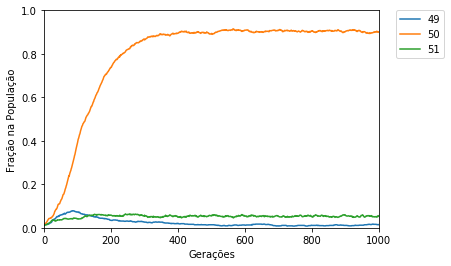

In [30]:
GA()

2) Genético padrão com $m = 100$

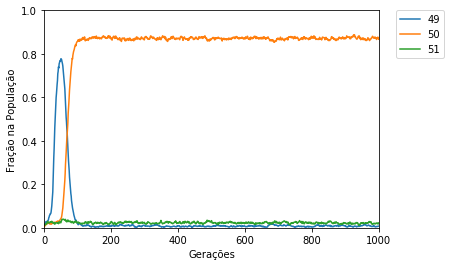

In [42]:
GA(m = 100)

3) Genético padrão com o dobro de gerações e com $m = 100$

In [ ]:
GA(epochs = 2000, m=100)

### TODO

- Mutação: pag 237 do livro
- Crossover:  
    1) Média de 2 bons valores  
    2) Olhar no livro